# Parameter Estimation

To find the parameter $ a $ in the differential equation 

$$ \frac{dy}{dt} = ay $$

with the initial condition $ y(0) = 1 $, you can use PyTorch to train a neural network to approximate $ a $. 



In this code:

1. We generate training data by defining the time points `t` and computing the true solution `y` based on the differential equation.

2. We convert the NumPy arrays to PyTorch tensors, as PyTorch is used for building and training the neural network.

3. We define a neural network class `ParameterEstimationNN` with one input layer, one hidden layer with ReLU activation, and one output layer.

4. We create an instance of the neural network, define the loss function (mean squared error), and set up the optimizer (Adam).

5. The model is trained to estimate the value of 'a' that minimizes the mean squared error between the estimated 'a' and the true 'a'.

6. After training, we extract the estimated 'a' from the model's output and compare it to the true 'a'.

This code provides an example of using a neural network with PyTorch to estimate the parameter 'a' in a given differential equation. The estimated 'a' should be close to the true 'a' (0.5) if the model has learned the relationship accurately.

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
# Generate training data
t = np.linspace(0, 5, 100)  # Time points from 0 to 5
true_a = 0.5  # True value of parameter 'a'
y = np.exp(true_a * t) +np.random.randn(len(t))  # True solution of dy/dt = ay

# Convert NumPy arrays to PyTorch tensors
t_tensor = torch.tensor(t, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Define a neural network to approximate 'a'
class ParameterEstimationNN(nn.Module):
    def __init__(self):
        super(ParameterEstimationNN, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the neural network
model = ParameterEstimationNN()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
A=[]
# Training the model to estimate 'a'
for epoch in range(1000):
    # Forward pass
    estimated_a = model(t_tensor)
    A.append(estimated_a.detach().numpy()[0, 0])
    # Compute the loss
    loss = criterion(estimated_a, true_a * torch.ones_like(estimated_a))
    
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Extract the estimated 'a'
estimated_a = model(t_tensor).detach().numpy()[0, 0]

# Print the estimated 'a'
print(f"Estimated 'a': {estimated_a}")

# Print the true 'a'
print(f"True 'a': {true_a}")


Estimated 'a': 0.48498088121414185
True 'a': 0.5


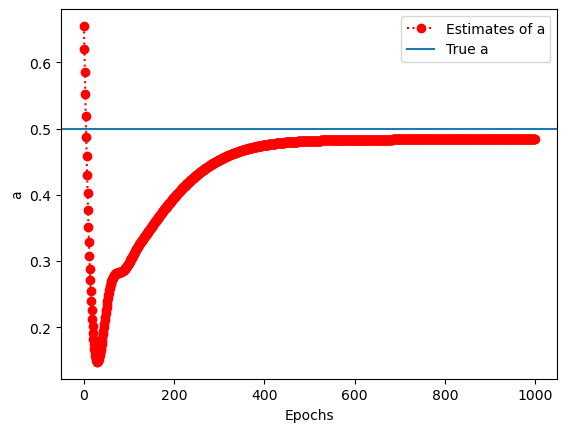

In [12]:
plt.plot(A,'ro:',label='Estimates of a')
plt.axhline(true_a,label='True a')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('a')
plt.show()